In [0]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import operator
from statistics import mean,pstdev
import numpy as np
import random
import copy
import math

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive/RecommenderSystems And TopicModelling Lab2

/content/drive/My Drive/RecommenderSystems And TopicModelling Lab2


In [0]:
path="data/ml-latest-small/"
ratings_path=path+"ratings.csv"
movies_path=path+"movies.csv"
path1="data/"

In [0]:
ratings_df=pd.read_csv(ratings_path)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
movie_indices=[]
inverse_movie_map={}
movies_df=pd.read_csv(movies_path)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
ratings_matrix_train[1]

array([nan, nan, nan, ..., nan, nan, nan])

In [0]:
ratings_matrix_train=np.load(path1+'ratings_matrix_train.npy')
train_nos=np.load(path1+'train_nos.npy')
test_nos=np.load(path1+'test_nos.npy')

In [0]:
ratings_matrix_train[0][3]

nan

In [0]:
correct_predictions=[]
for i in test_nos:
    correct_predictions.append(ratings_df['rating'][i])

In [0]:
def mean_with_nan(list_a):
    count=0
    sum=0.0
    for i in list_a:
        if not np.isnan(i):
            #print(i)
            count+=1
            sum+=i
    #print(sum) 
    if(count==0):
        return 0
    return sum/count     

In [0]:
for i in range(len(movies_df)):
    movie_indices.append(movies_df['movieId'][i])
    inverse_movie_map[movies_df['movieId'][i]]=i
number_of_items=len(movie_indices)

In [0]:
number_of_users={}
for i in range(len(ratings_df)):
    number_of_users[ratings_df['userId'][i]]=1
number_of_users=len(number_of_users)

In [0]:
obs_entries =[]
for i in range(number_of_users):
    for j in range(number_of_items):
        if np.isnan(ratings_matrix_train[i][j])==False:
            obs_entries.append((i,j))

In [0]:
len(obs_entries)


70585

In [0]:
obs_entries[0]

(46, 7976)

In [0]:
ratings_matrix = np.zeros((number_of_users,number_of_items))
ratings_matrix = copy.deepcopy(ratings_matrix_train)
cnt=0
for i in range(number_of_users):
    mean = mean_with_nan(ratings_matrix_train[i])
    for j in range(number_of_items):
        if np.isnan(ratings_matrix[i][j]):
            ratings_matrix[i][j]=mean

In [0]:
#obtaining eigen values with the help of svd
u,sigma,v = np.linalg.svd(ratings_matrix,full_matrices=True)

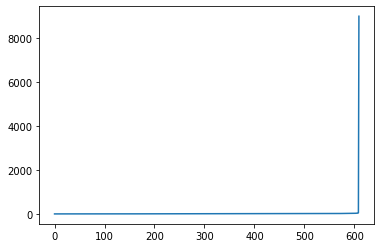

In [0]:
sigma.sort()
plt.plot(sigma)

In [0]:
print(np.mean(sigma))
x = np.mean(sigma)
cnt=0
for i in range(len(sigma)):
    if sigma[i]>5:
        cnt+=1
print(cnt)

22.47786993225202
346


In [0]:
k=346

In [0]:
def rmse_error(a,b):# a and b are lists
    error_sum=0.0
    for i in range(len(a)):
        error_sum+=(a[i]-b[i])*(a[i]-b[i])
    error_sum/=len(a)
    return np.sqrt(error_sum)  

In [0]:
def GradientDescent(R,k,lr,epochs):
    number_of_items=len(R[0])
    number_of_users=len(R[:,0])
    U=np.random.rand(number_of_users,k)
    V=np.random.rand(number_of_items,k)
    error_mat=np.zeros(shape=(number_of_users,number_of_items))
    num_iters=0
    while(num_iters<epochs):
        num_iters+=1
        
        predicted_matrix=np.dot(U,np.transpose(V))


        predicted_matrix=np.dot(U,np.transpose(V))
        error_mat=R-predicted_matrix
        error=0
        for tups in obs_entries:
            x=tups[0]
            y=tups[1]
            error+=(R[x][y]-predicted_matrix[x][y])*(R[x][y]-predicted_matrix[x][y])
        error=sqrt(error) 
        if(num_iters%100==0):
            error=0
            for tups in obs_entries:
                x=tups[0]
                y=tups[1]
                error+=(R[x][y]-predicted_matrix[x][y])*(R[x][y]-predicted_matrix[x][y])
            error=sqrt(error)            
            result_gd_batch=[]
            for i in test_nos:


                movie_no=inverse_movie_map[ratings_df['movieId'][i]]
                user_no=ratings_df['userId'][i]-1
                result_gd_batch.append(predicted_matrix[user_no][movie_no])
            print("Number of iterations: "+str(num_iters)+" Frob Error: "+str(error)+" RMS Error: "+str(rmse_error(correct_predictions,result_gd_batch)))
        #      print("Error is " +str(error) )
        U_add=np.zeros(shape=(number_of_users,k))
        V_add=np.zeros(shape=(number_of_items,k))
        for tups in obs_entries:
            x=tups[0]
            y=tups[1]
            for q_ind in range(k):
                U_add[x][q_ind]+=error_mat[x][y]*V[y][q_ind]
                V_add[y][q_ind]+=error_mat[x][y]*U[x][q_ind]
                 
        U=U+lr*(U_add)
        V=V+lr*(V_add)
#   predicted_matrix=np.dot(U,np.transpose(V))
#   return predicted_matrix
    return U,V
  

In [0]:
u_bgd,v_bgd = batch_gradient_descent(ratings_matrix,346,10000000,5e-6)

In [0]:
def stochastic_gradient_descent(r_m,rows,cols,iterations,alpha,obs_entries):
    u = np.random.rand(rows,k)
    v = np.random.rand(cols,k)
    e = np.zeros((rows,cols))
    print(len(obs_entries))
    random.shuffle(obs_entries)

    for i1 in range(iterations):
      for tups in obs_entries:
        i=tups[0]
        j=tups[1]

        e[i][j]=r_m[i][j]-np.dot(u[i],np.transpose(v[j]))
        for q in range(k):
            u_temp[i][q]=u[i][q]+alpha*e[i][j]*v[j][q]
        for q in range(k):
            v_temp[j][q]=v[j][q]+alpha*e[i][j]*u[i][q]
        for q in range(k):
            u[i][q]=u_temp[i][q]
            v[j][q]=v_temp[j][q]
      if i1%5==0:
          print("i1: "+str(i1)+' '+str(np.linalg.norm(e,ord='fro')))
     

In [57]:
stochastic_gradient_descent(ratings_matrix_train,number_of_users,number_of_items,1000,1.5e-6,obs_entries)

70585
i1: 0 21464.034555460465
i1: 5 17188.27141881975
i1: 10 14769.26733242688
i1: 15 13127.120277858476
i1: 20 11908.290482108654
i1: 25 10954.35139246498
i1: 30 10180.110859669698


KeyboardInterrupt: ignored

In [0]:
rows=number_of_users
cols=number_of_items
print(test_nos[0])

0


In [0]:
#gd with regularization
# def gd_regularized(r_m,rows,cols,iterations,alpha,reg_param):
#     u = np.random.rand(rows,k)
#     v = np.random.rand(cols,k)
#     e = np.zeros((rows,cols))
#     for i in range(iterations):
#         e_mat4 = r_m - np.dot(u_mat4,np.transpose(v_mat4))
#         if i%5==0:
#             print('i: '+str(i)+' '+np.linalg.norm(e,ord='fro'))
#         u = u*(1-alpha*reg_param) + alpha*(np.dot(e,v))
#         v = v*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e),u))

In [0]:
#gradient descent with user and item biases and regularization
def gd_reg_bias(r_m,rows,cols,iterations,alpha,reg_param):
    u = np.random.rand(rows,k+2)
    v = np.random.rand(cols,k+2)
    for i in range(rows):
        u[i][k]=1
    for i in range(cols):
        v[i][k]=1
    e = np.zeros((rows,cols))
    for _iter in range(1000):
        e = r_m - np.dot(u,np.transpose(v))
        if _iter%10==0:
            print("num of iterations: "+str(_iter))
            print(np.linalg.norm(e,ord='fro'))
        u = u*(1-alpha*_lambda) + alpha*(np.dot(e,v))
        for i in range(rows):
            u[i][k]=1
        v = v*(1-alpha*_lambda) + alpha*(np.dot(np.transpose(e),u))
        for i in range(cols):
            v[i][k]=1

In [0]:
random.shuffle(train_nos)

In [0]:
length = len(train_nos)
p1 = copy.deepcopy(ratings_matrix)
p2 = copy.deepcopy(ratings_matrix)
p3 = copy.deepcopy(ratings_matrix)
p4 = copy.deepcopy(ratings_matrix)
p5 = copy.deepcopy(ratings_matrix)
for i in  range(0,length//5):#first 1/5 is the test set
    p1[ratings_df['userId'][i]][inverse_movie_map[ratings_df['movieId'][i]]]=0
for i in range(length//5,(2*length)//5):#second 1/5 is the test set
    p2[ratings_df['userId'][i]][inverse_movie_map[ratings_df['movieId'][i]]]=0
for i in range((2*length)//5,(3*length)//5):#third 1/5 is the test set
    p3[ratings_df['userId'][i]][inverse_movie_map[ratings_df['movieId'][i]]]=0
for i in range((3*length)//5,(4*length)//5):#fourth 1/5 is the test set
    p4[ratings_df['userId'][i]][inverse_movie_map[ratings_df['movieId'][i]]]=0
for i in range((4*length)//5,(5*length)//5):#fifth 1/5 is the test set
    p5[ratings_df['userId'][i]][inverse_movie_map[ratings_df['movieId'][i]]]=0

In [0]:
reg_param = 35

In [0]:
alpha = 1e-7

In [0]:
#case1:
u2 = np.random.rand(number_of_users,k)
v2 = np.random.rand(number_of_items,k)
e2 = np.zeros((number_of_users,number_of_items))
for i in range(100):
    e2 = p1 - np.dot(u2,np.transpose(v2))
    if i%10==0:
        print("num of iterations: "+str(i))
        print(np.sum(np.absolute(e2))/(0.8*number_of_users*number_of_items))
    u2 = u2*(1-alpha*reg_param) + alpha*(np.dot(e2,v2))
    v2 = v2*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e2),u2))

num of iterations: 0
103.4972807869632
num of iterations: 10
42.840490729594556
num of iterations: 20
18.521554161816145
num of iterations: 30
8.077696185014593
num of iterations: 40
3.5843530982360554
num of iterations: 50
2.0166843872861504
num of iterations: 60
1.6432017241616554
num of iterations: 70
1.5673964166673275
num of iterations: 80
1.5517317148632097
num of iterations: 90
1.547613347396802


In [0]:
#case1 error:
err1=0
n=0
for i in range(0,length//5):
    x = ratings_df['userId'][i]
    y = inverse_movie_map[ratings_df['movieId'][i]]
    actual = ratings_matrix_train[x][y]
    if np.isnan(actual)==False:
        pred = np.dot(u2[x],np.transpose(v2[y]))
        diff = pred-actual
        diff = diff*diff
        err1 += diff
        n += 1
if n==0:
    err1=0
else:
    err1=math.sqrt(err1/n)
print(err1)

1.7952242662097118


In [0]:
#case2:
u2 = np.random.rand(number_of_users,k)
v2 = np.random.rand(number_of_items,k)
e2 = np.zeros((number_of_users,number_of_items))
for i in range(100):
    e2 = p2 - np.dot(u2,np.transpose(v2))
    if i%10==0:
        print("num of iterations: "+str(i))
        print(np.sum(np.absolute(e2))/(0.8*number_of_users*number_of_items))
    u2 = u2*(1-alpha*reg_param) + alpha*(np.dot(e2,v2))
    v2 = v2*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e2),u2))

num of iterations: 0
103.43410967111451
num of iterations: 10
42.84307748883951
num of iterations: 20
18.534845121341046
num of iterations: 30
8.088867484641266
num of iterations: 40
3.5905658417591058
num of iterations: 50
2.0171694341152984
num of iterations: 60
1.6411797584048817
num of iterations: 70
1.5645718249411342
num of iterations: 80
1.5486548152591912
num of iterations: 90
1.54445421215528


In [0]:
#case2 error:
err2=0
n=0
for i in range(length//5,(2*length)//5):
    x = ratings_df['userId'][i]
    y = inverse_movie_map[ratings_df['movieId'][i]]
    actual = ratings_matrix_train[x][y]
    if np.isnan(actual)==False:
        pred = np.dot(u2[x],np.transpose(v2[y]))
        diff = pred-actual
        diff = diff*diff
        err2 += diff
        n += 1
if n==0:
    err2=0
else:
    err2=math.sqrt(err1/n)
print(err2)

0.04831657990421836


In [0]:
#case3:
u2 = np.random.rand(number_of_users,k)
v2 = np.random.rand(number_of_items,k)
e2 = np.zeros((number_of_users,number_of_items))
for i in range(100):
    e2 = p3 - np.dot(u2,np.transpose(v2))
    if i%10==0:
        print("num of iterations: "+str(i))
        print(np.sum(np.absolute(e2))/(0.8*number_of_users*number_of_items))
    u2 = u2*(1-alpha*reg_param) + alpha*(np.dot(e2,v2))
    v2 = v2*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e2),u2))
#case2 error:
err3=0
n=0
for i in range((2*length)//5,(3*length)//5):
    x = ratings_df['userId'][i]
    y = inverse_movie_map[ratings_df['movieId'][i]]
    actual = ratings_matrix_train[x][y]
    if np.isnan(actual)==False:
        pred = np.dot(u2[x],np.transpose(v2[y]))
        diff = pred-actual
        diff = diff*diff
        err3 += diff
        n += 1
if n==0:
    err3=0
else:
    err3=math.sqrt(err1/n)
print(err3)

num of iterations: 0
103.57277336913533
num of iterations: 10
42.89351628265257
num of iterations: 20
18.55554071431159
num of iterations: 30
8.097559343718986
num of iterations: 40
3.59412835435279
num of iterations: 50
2.0178905290640325
num of iterations: 60
1.6411181266997905
num of iterations: 70
1.5644231537464208
num of iterations: 80
1.5485414085162585
num of iterations: 90
1.5443731490131611
0.03984080019331883


In [0]:
#case4:
u2 = np.random.rand(number_of_users,k)
v2 = np.random.rand(number_of_items,k)
e2 = np.zeros((number_of_users,number_of_items))
for i in range(100):
    e2 = p4 - np.dot(u2,np.transpose(v2))
    if i%10==0:
        print("num of iterations: "+str(i))
        print(np.sum(np.absolute(e2))/(0.8*number_of_users*number_of_items))
    u2 = u2*(1-alpha*reg_param) + alpha*(np.dot(e2,v2))
    v2 = v2*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e2),u2))
#case4 error:
err4=0
n=0
for i in range((3*length)//5,(4*length)//5):
    x = ratings_df['userId'][i]
    y = inverse_movie_map[ratings_df['movieId'][i]]
    actual = ratings_matrix_train[x][y]
    if np.isnan(actual)==False:
        pred = np.dot(u2[x],np.transpose(v2[y]))
        diff = pred-actual
        diff = diff*diff
        err4 += diff
        n += 1
if n==0:
    err4=0
else:
    err4=math.sqrt(err1/n)
print(err4)

num of iterations: 0
103.428323574191
num of iterations: 10
42.84652013925748
num of iterations: 20
18.538963973807345
num of iterations: 30
8.091833352550156
num of iterations: 40
3.592409500765455
num of iterations: 50
2.0182006193970454
num of iterations: 60
1.6420608418447404
num of iterations: 70
1.5655038308642089
num of iterations: 80
1.549696252768648
num of iterations: 90
1.5455479393509854
0.04524385046390424


In [0]:
#case5:
u2 = np.random.rand(number_of_users,k)
v2 = np.random.rand(number_of_items,k)
e2 = np.zeros((number_of_users,number_of_items))
for i in range(100):
    e2 = p5 - np.dot(u2,np.transpose(v2))
    if i%10==0:
        print("num of iterations: "+str(i))
        print(np.sum(np.absolute(e2))/(0.8*number_of_users*number_of_items))
    u2 = u2*(1-alpha*reg_param) + alpha*(np.dot(e2,v2))
    v2 = v2*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e2),u2))
#case4 error:
err5=0
n=0
for i in range((4*length)//5,(5*length)//5):
    x = ratings_df['userId'][i]
    y = inverse_movie_map[ratings_df['movieId'][i]]
    actual = ratings_matrix_train[x][y]
    if np.isnan(actual)==False:
        pred = np.dot(u2[x],np.transpose(v2[y]))
        diff = pred-actual
        diff = diff*diff
        err5 += diff
        n += 1
if n==0:
    err5=0
else:
    err5=math.sqrt(err1/n)
print(err5)

num of iterations: 0
103.53809348083115
num of iterations: 10
42.8320176013058
num of iterations: 20
18.506975172541097
num of iterations: 30
8.066452119921667
num of iterations: 40
3.5776364788764314
num of iterations: 50
2.013538850629031
num of iterations: 60
1.6410225392596482
num of iterations: 70
1.5653079802188163
num of iterations: 80
1.5496269524672182
num of iterations: 90
1.5454820250461418
0.04524385046390424


In [0]:
avg = (err1+err2+err3+err4+err5)/5
print(avg)

0.39477386944701154


In [0]:
reg_param avg
2 0.40193155365284633
5 0.3987769015126784
10 0.39639918551247166
25 0.3941284325416964
35 0.39477386944701154
50 0.4077619971468356
100 0.40115566745508746
200 0.39375657175193746
chosen value of reg_param = 25

In [0]:
iterations = 4250
reg_param=25
alpha=1.5e-6

In [0]:
u_reg = np.random.rand(number_of_users,k)
v_reg = np.random.rand(number_of_items,k)
e_reg = np.zeros((number_of_users,number_of_items))
for i in range(iterations):
    e_reg = ratings_matrix - np.dot(u_reg,np.transpose(v_reg))
    if i%10==0:
        print("i: "+str(i)+' '+str(np.linalg.norm(e_reg,ord='fro')))
    u_reg = u_reg*(1-alpha*reg_param) + alpha*(np.dot(e_reg,v_reg))
    v_reg = v_reg*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e_reg),u_reg))

i: 0 7299.526173201101
i: 10 6524.749245193811
i: 20 5779.405325170705
i: 30 5069.689417812014
i: 40 4407.685743552395
i: 50 3805.98347338926
i: 60 3273.802533023494
i: 70 2815.007669649706
i: 80 2427.938090625012
i: 90 2106.540107588648
i: 100 1842.1066516413123
i: 110 1625.0067668342913
i: 120 1446.014620769864
i: 130 1297.0990601711255
i: 140 1171.7271289625294
i: 150 1064.8314156572524
i: 160 972.6010115070904
i: 170 892.2166316090837
i: 180 821.5998876559868
i: 190 759.2064897494697
i: 200 703.8688571606043
i: 210 654.6822316062159
i: 220 610.924873143136
i: 230 572.0032396388324
i: 240 537.4147666306079
i: 250 506.7227697917761
i: 260 479.53961143473873
i: 270 455.5154911521502
i: 280 434.33107439061234
i: 290 415.6927430826403
i: 300 399.3296228017356
i: 310 384.9917805519586
i: 320 372.44914770468483
i: 330 361.4908382358739
i: 340 351.92462358458465
i: 350 343.57640186136183
i: 360 336.2895637861565
i: 370 329.92421040549425
i: 380 324.35621745917564
i: 390 319.47616817813895


In [0]:
#finding rmse error after regularized gd:

np.save('u_reg',u_reg)
np.save('v_reg',v_reg)

In [0]:
reg_result=[]
final_matrix=np.dot(u_reg,(np.transpose(v_reg)))
for i in test_nos:
    user_no=ratings_df['userId'][i]-1
    movie_no=ratings_df['movieId'][i]
    movie_no=inverse_movie_map[movie_no]
    reg_result.append(final_matrix[user_no][movie_no])

In [0]:
rmse_error(reg_result,correct_predictions)

0.938462140687939

In [0]:
missing_entries =[]
for i in range(number_of_users):
    for j in range(number_of_items):
        if np.isnan(ratings_matrix_train[i][j])==True:
            missing_entries.append((i,j))

In [0]:
len(missing_entries)

5872035

In [0]:
#svd
iterations=80
prev = copy.deepcopy(ratings_matrix)
curr = copy.deepcopy(ratings_matrix)
for i in range(iterations):
    q,sigma,p_t = np.linalg.svd(curr)
    q = q[:,:k]
    sigma = np.diag(sigma)
    sigma = sigma[:k,:k]
    p_t = p_t[:k,:]
    prev = copy.deepcopy(curr)
    n=0
    temp = np.dot(np.dot(q,sigma),p_t)
    for j in range(len(missing_entries)):
        x1 = missing_entries[j][0]
        y1 = missing_entries[j][1]
        curr[x1][y1]=temp[x1][y1]
    e_svd = prev-curr
    if i%5==0:
        print('i: '+str(i)+' '+str(np.linalg.norm(e_svd,ord='fro')))

i: 0 44.421804482111526
i: 5 19.911240527039677
i: 10 14.391934763941867
i: 15 11.86230233606994
i: 20 10.227152833098126
i: 25 9.041091654082091
i: 30 8.147644670723729
i: 35 7.4515833329460985
i: 40 6.892618863971486
i: 45 6.432370126318942
i: 50 6.0451862030903305
i: 55 5.7132794587051166
i: 60 5.42413105881032
i: 65 5.168861617912406
i: 70 4.941095431662545
i: 75 4.736160084941204


In [0]:
#finding the error


svd_result=[]
final_matrix=np.dot(np.dot(q,sigma),p_t)
for i in test_nos:
    user_no=ratings_df['userId'][i]-1
    movie_no=ratings_df['movieId'][i]
    movie_no=inverse_movie_map[movie_no]
    svd_result.append(final_matrix[user_no][movie_no])
print(rmse_error(correct_predictions,svd_result))   

0.8924848387583938


In [0]:
np.save('q',q)
np.save('sigma',sigma)
np.save('p_t',p_t)

In [0]:
#case1:
u2 = np.random.rand(number_of_users,k)
v2 = np.random.rand(number_of_items,k)
w_mat=np.dot(ratings_matrix,ratings_matrix)
e2 = np.zeros((number_of_users,number_of_items))
for i in range(100):
    e2 = p1 - np.dot(u2,np.transpose(v2))
    if i%10==0:
        print("num of iterations: "+str(i))
        print(np.sum(np.absolute(e2))/(0.8*number_of_users*number_of_items))
    u2 = u2*(1-alpha*reg_param) + alpha*(np.dot(e2,v2))
    v2 = v2*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e2),u2))

In [0]:
for iters in range(iterations):
  error_mat=ratings_matrix-np.dot(u2,np.transpose(v2))
  if (iters%5==0):
    print("num of iterations: "+str(i))
    print(np.linalg.norm(error_mat,ird='fro')
    
    
      

In [0]:
#NMF

In [0]:
k=346

In [0]:
u=np.random.rand(number_of_users,k)
v=np.random.rand(number_of_items,k)
w=np.dot(np.transpose(ratings_matrix),ratings_matrix)
l_list=[]
for i in range(number_of_items):
  sum=0
  for j in range(number_of_items):
    sum+=w[i][j]
  l_list.append(sum)
 

In [0]:
diag=np.diag(l_list)

In [0]:
iterations=10
_lambda=25

In [0]:
for iter in range(iterations):
  error_mat=ratings_matrix-np.dot(u,np.transpose(v))
#   if(iter%10==0):
  print("Iteration : "+str(iter+1)+" Error is : "+str(np.linalg.norm(error_mat,ord='fro')))
  denom1=np.dot(np.dot(u,np.transpose(v)),v)
  denom1=denom1+1e-11
  u_temp=u*((np.dot(ratings_matrix,v))/denom1)
  u=copy.deepcopy(u_temp)
  denom2=np.dot(np.dot(np.transpose(u),u),np.transpose(v))+_lambda*np.dot(np.transpose(v),diag)
  denom2=denom2+1e-11
  v_temp=np.transpose(v)*((np.dot(np.transpose(u),ratings_matrix)+_lambda*np.dot(np.transpose(v),w))/denom2)
  v_temp=np.transpose(v_temp)
  v=copy.deepcopy(v_temp)
  

Iteration : 1 Error is : 201963.7118215931
Iteration : 2 Error is : 247.6931845407991
Iteration : 3 Error is : 247.42068545849875
Iteration : 4 Error is : 247.4206854574586
Iteration : 5 Error is : 247.42068545745852
Iteration : 6 Error is : 247.42068545745852
Iteration : 7 Error is : 247.4206854574585
Iteration : 8 Error is : 247.42068545745852
Iteration : 9 Error is : 247.42068545745852
Iteration : 10 Error is : 247.42068545745852


In [0]:
nmf_result=[]
final_matrix=np.dot(u,(np.transpose(v)))
for i in test_nos:
    user_no=ratings_df['userId'][i]-1
    movie_no=ratings_df['movieId'][i]
    movie_no=inverse_movie_map[movie_no]
    nmf_result.append(final_matrix[user_no][movie_no])
    

In [0]:
rmse_error(nmf_result,correct_predictions)

0.9468013393608824

In [0]:
def bgd_bias(r_m,rows,cols,iterations,alpha,reg_param):
    u = np.random.rand(rows,k+1)
    u=np.c_[u,np.ones(rows)]
    
    v = np.random.rand(cols,k)
    v=np.c_[v,np.ones(cols)]
    v=np.c_[v,np.random.rand(cols)]
    
    
    
    e = np.zeros((rows,cols))
    for i in range(iterations):
        e = r_m - np.dot(u,np.transpose(v))
        if i%100==0:
            print("i: "+str(i)+' '+str(np.linalg.norm(e,ord='fro')))
        u = u*(1-alpha*reg_param) + alpha*(np.dot(e,v))
        v= v*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e),u))
        u[:,k+1]=np.ones(rows)
        v[:,k]=np.ones(cols)
        
    return u,v

In [0]:
u_b,v_b=bgd_bias(ratings_matrix,number_of_users,number_of_items,5700,1.5e-6,25)

i: 0 5025.521123323623
i: 100 1126.8499059996918
i: 200 801.3373471245886
i: 300 609.705227446017
i: 400 484.7817669674795
i: 500 403.93207295016896
i: 600 352.5886544216913
i: 700 320.5227584790579
i: 800 300.5864868097326
i: 900 288.0373651787721
i: 1000 279.9083352265118
i: 1100 274.42395367908847
i: 1200 270.5480517169442
i: 1300 267.6800636613103
i: 1400 265.46894094845845
i: 1500 263.70504486989955
i: 1600 262.2591167446296
i: 1700 261.0482517408828
i: 1800 260.01694397286593
i: 1900 259.12643411513903
i: 2000 258.348615450005
i: 2100 257.66245389497703
i: 2200 257.05181111022375
i: 2300 256.5040662474722
i: 2400 256.009205068495
i: 2500 255.55919237268785
i: 2600 255.1475233078748
i: 2700 254.7688926008254
i: 2800 254.4189448191958
i: 2900 254.09408240644288
i: 3000 253.79131617734535
i: 3100 253.508147765987
i: 3200 253.24247654581694
i: 3300 252.99252553416986
i: 3400 252.7567821605394
i: 3500 252.5339507503193
i: 3600 252.3229142882778
i: 3700 252.12270356037484
i: 3800 251.9

In [0]:
bias_result=[]
final_matrix=np.dot(u_b,(np.transpose(v_b)))
for i in test_nos:
    user_no=ratings_df['userId'][i]-1
    movie_no=ratings_df['movieId'][i]
    movie_no=inverse_movie_map[movie_no]
    bias_result.append(final_matrix[user_no][movie_no])
print(rmse_error(correct_predictions,bias_result))    

0.9379407378990257


In [0]:
print